In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [2]:
users = pd.read_pickle('users.pkl')

In [3]:
# Eliminar columnas no utilizables
users = users[['Cat', 'default_profile', 'description', 'geo_enabled', 'lang', 'listed_count', 'location', 'name', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'screen_name', 'url','favs_tiempo','followers_tiempo', 'statuses_tiempo','friends_tiempo']]

In [4]:
# Generar eje X de features y Normalizarlo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = users.drop(columns='Cat')
X = scaler.fit_transform(X)

In [5]:
# Generar eje Y de targets y encodear las etiquetas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y =  le.fit_transform(users['Cat'])
y

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
# Separar entre train y test
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic =  LogisticRegression()

hyperparameters = {'C': np.logspace(0, 4, 50), 
                   'penalty': ['l1', 'l2']}

clasificador = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

best_model = clasificador.fit(X_train, y_train)

print('Mejor Penalización:', best_model.best_estimator_.get_params()['penalty'])

print('Mejor C:', best_model.best_estimator_.get_params()['C'])

Mejor Penalización: l1
Mejor C: 9.54095476349994


In [10]:
modelo_final = best_model.best_estimator_
best_model.best_estimator_

LogisticRegression(C=9.54095476349994, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [11]:
# Predecir valores de test
y_pred = modelo_final.predict(X_test)

In [12]:
# Calculamos el accuracy general del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.951967978652435

In [13]:
# Matriz de confusión
confusion_matrix(y_test, y_pred)

array([[254,  16,  11,   4],
       [  7, 223,   3,   6],
       [  4,   0, 874,   0],
       [  6,   7,   8,  76]])

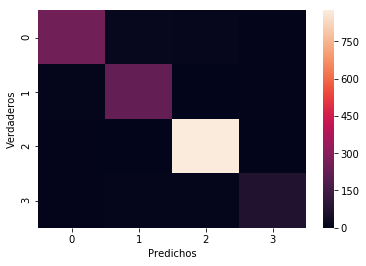

In [14]:
# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');